In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython.display import display

%matplotlib inline

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
sample_weight = np.load('sample_weight.npy')

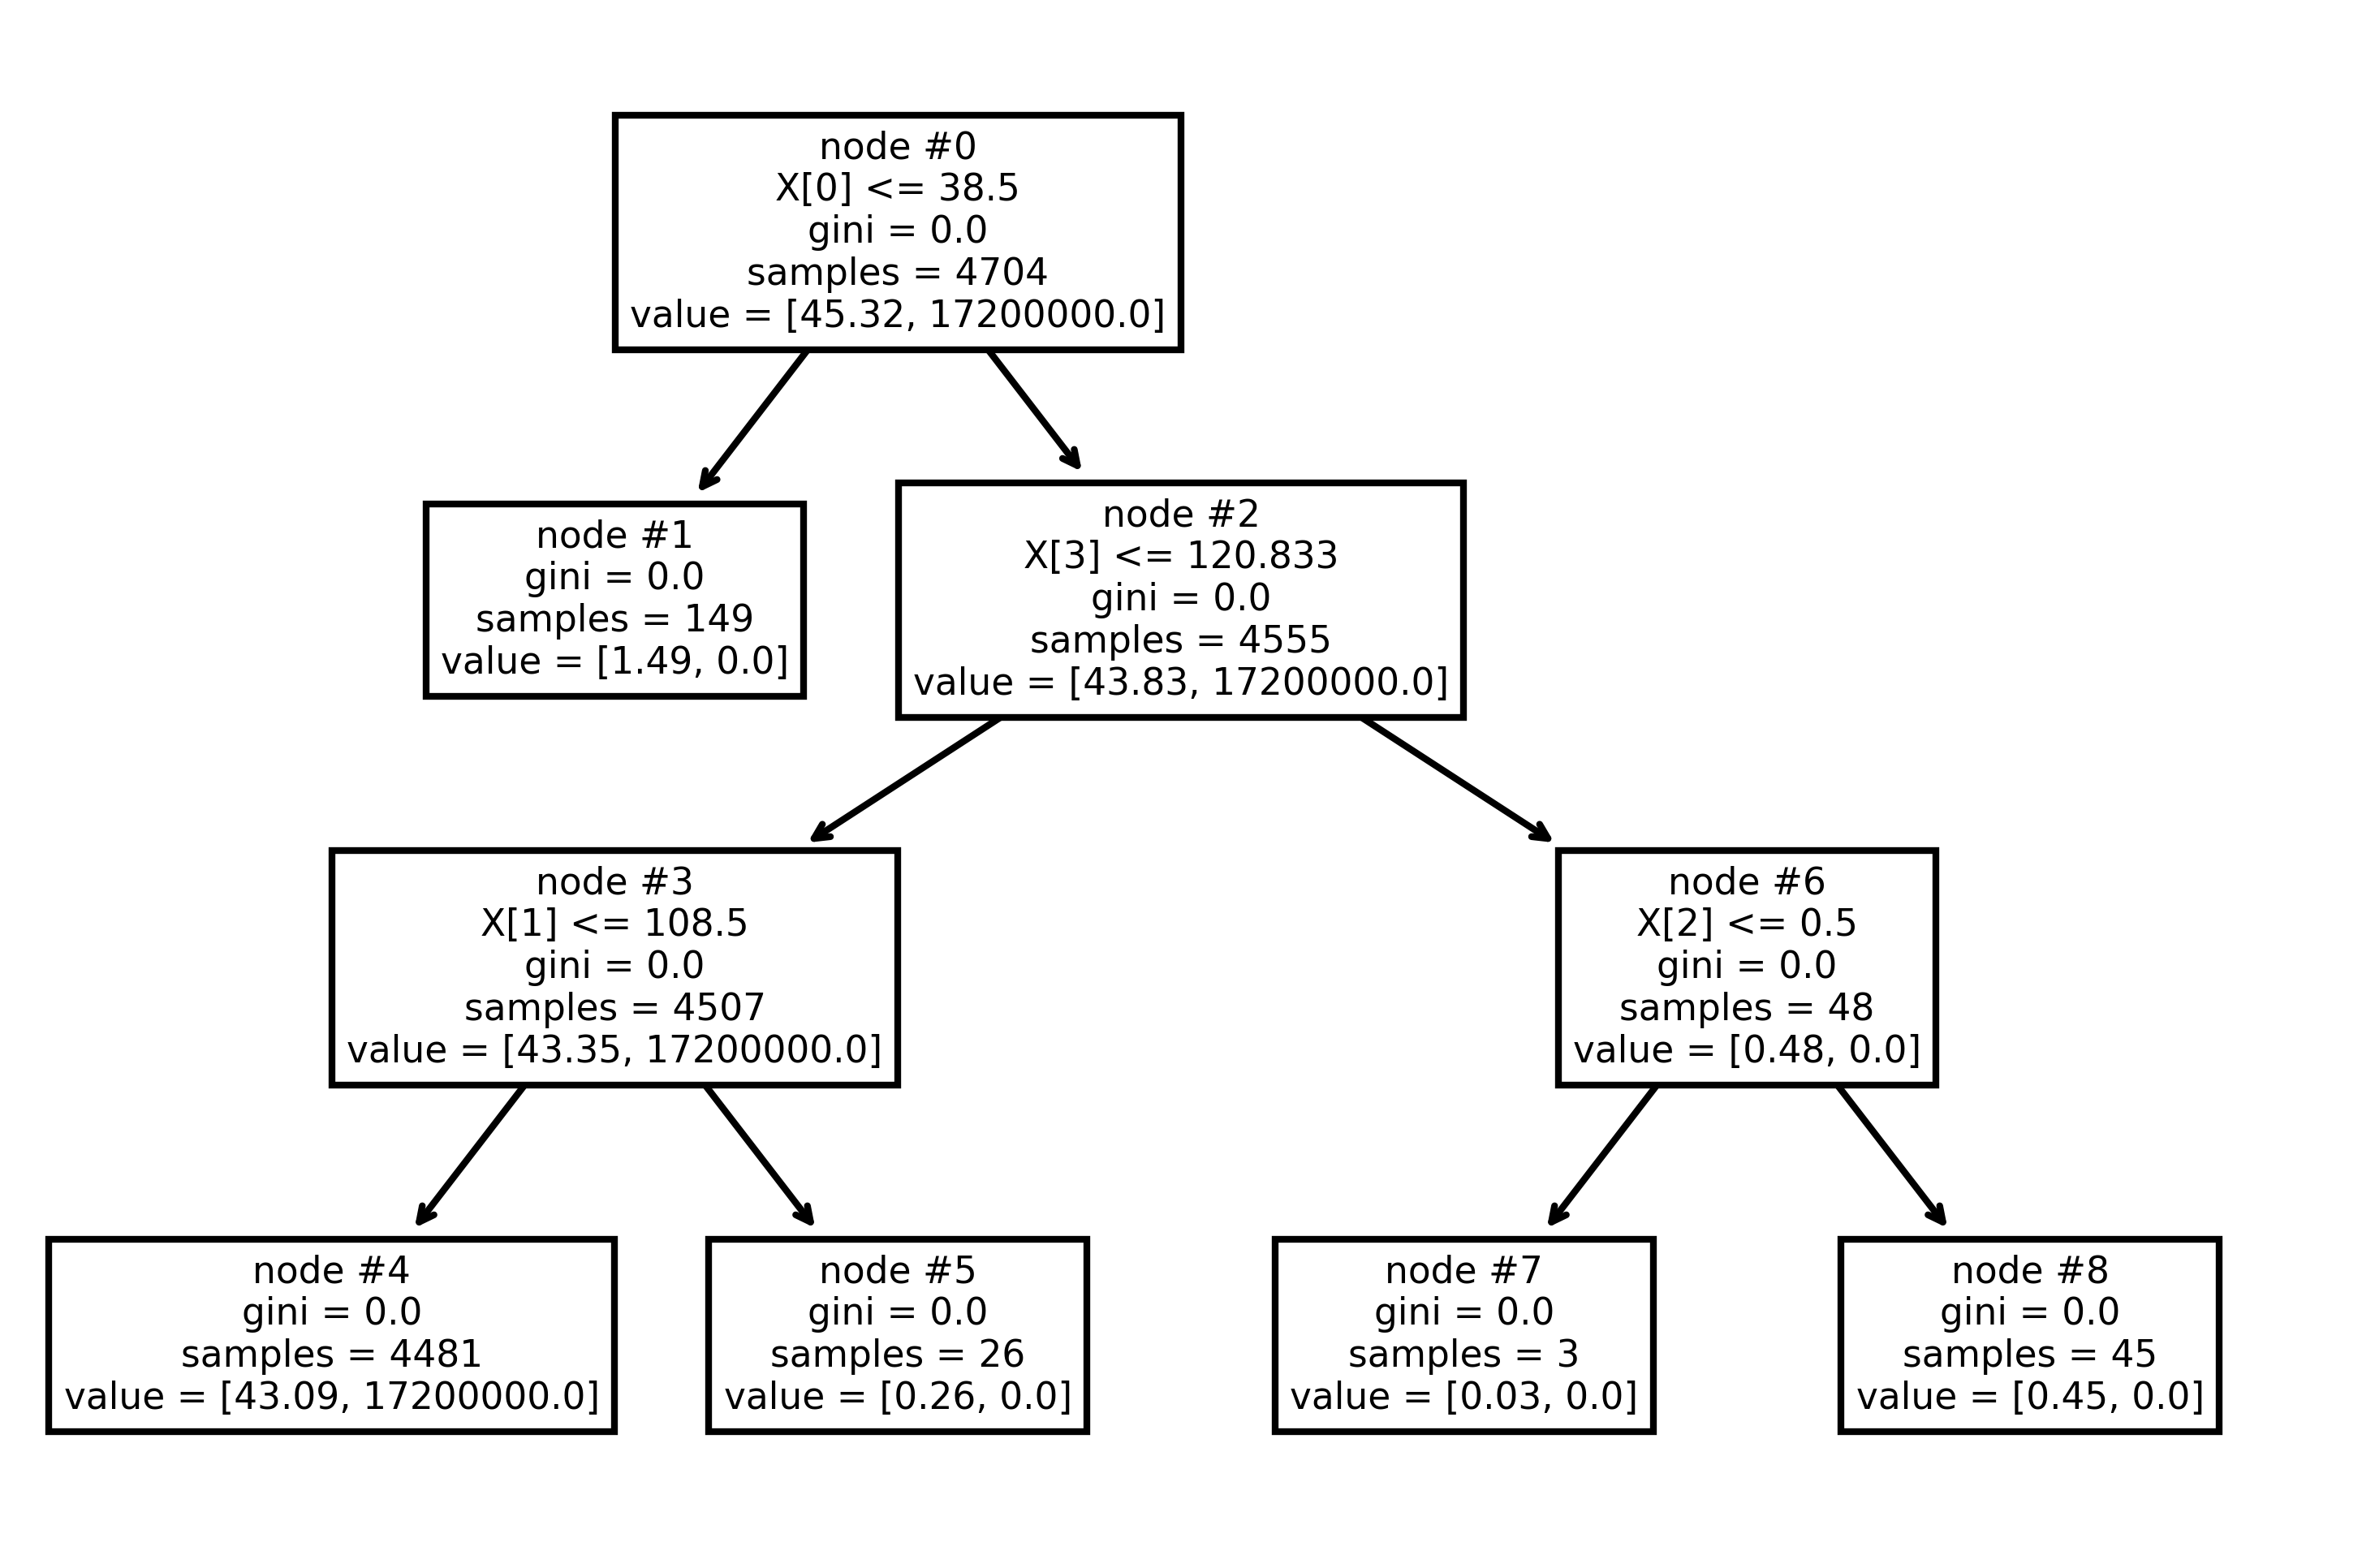

In [3]:
cfl = DecisionTreeClassifier(
    max_depth = 3,
    criterion = 'gini'
).fit(X, y, sample_weight)

plt.figure(dpi = 600)
_ = plot_tree(cfl, node_ids = True)

In [4]:
cfl.tree_.impurity[6]

3.278258635663889e-07

In [5]:
X_dp = cfl.decision_path(X).toarray()
np.unique(y[X_dp[:, 6] == 1])

array([0], dtype=int64)

In [6]:
cfl.tree_.value[6][0, 1]

0.0

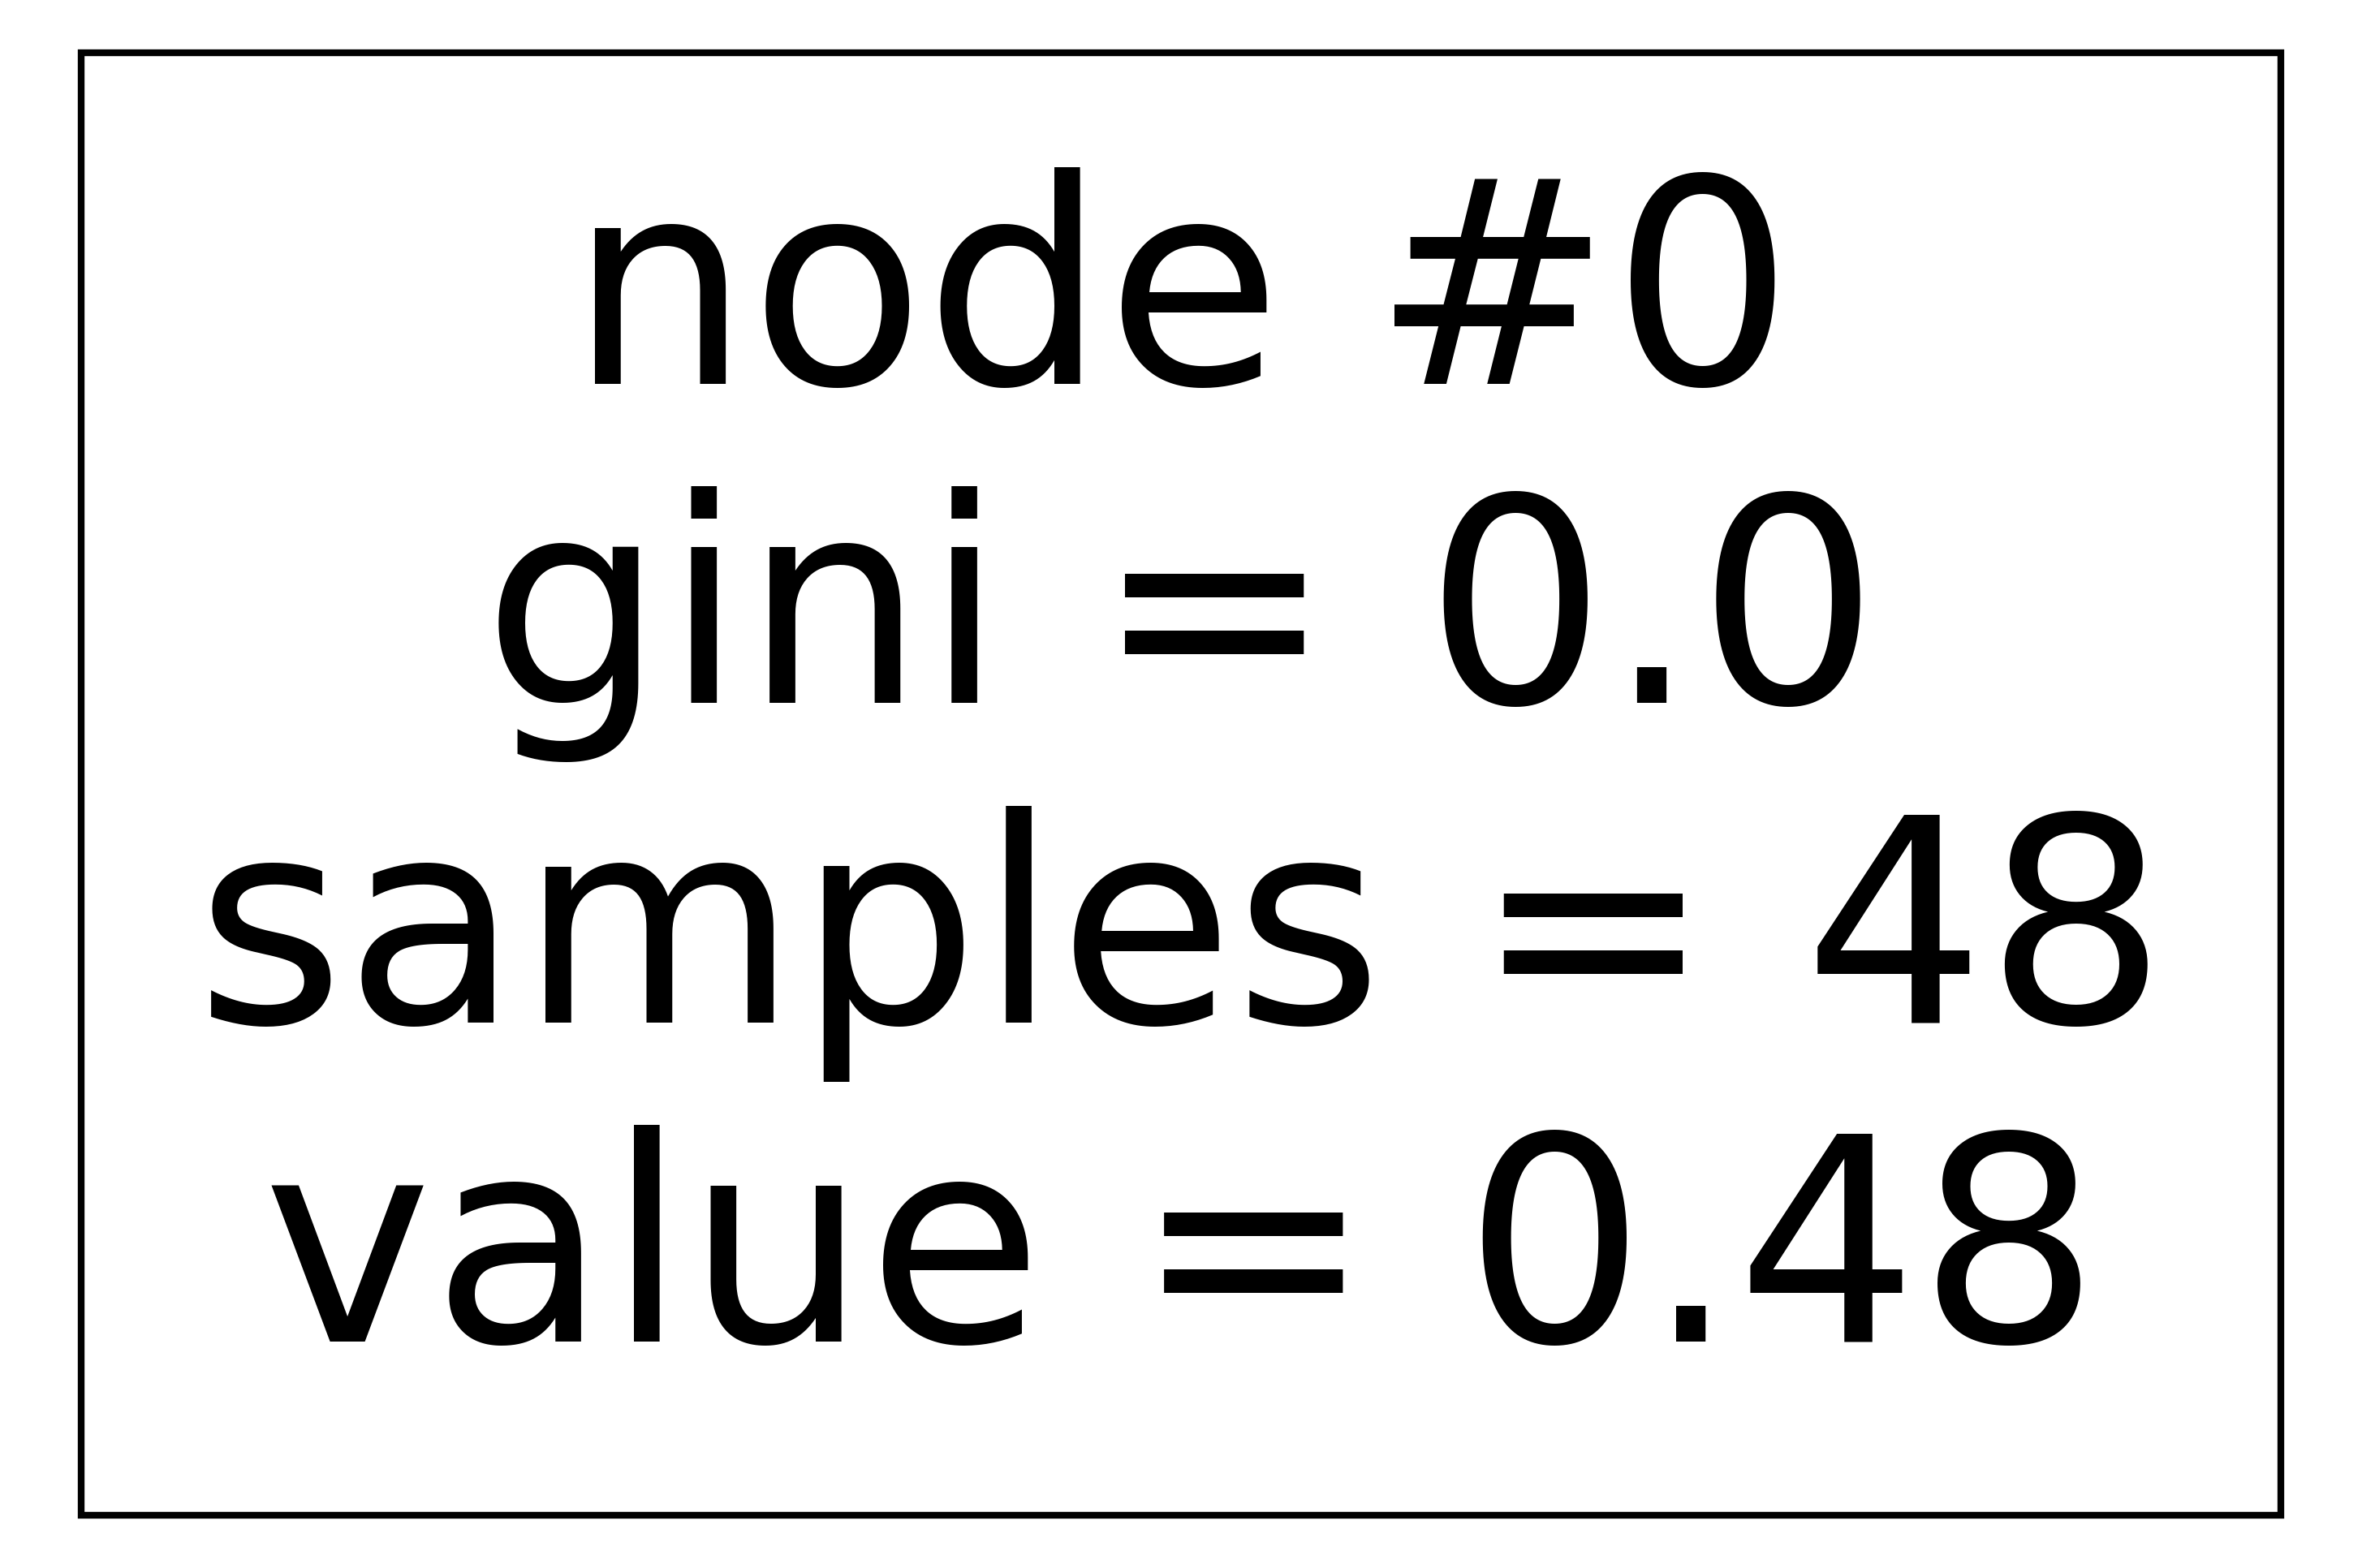

In [8]:
cfl_sub = DecisionTreeClassifier(
    max_depth = 3,
    criterion = 'gini'
).fit(X[X_dp[:, 6] == 1, :], y[X_dp[:, 6] == 1], sample_weight[X_dp[:, 6] == 1])

plt.figure(dpi = 600)
_ = plot_tree(cfl_sub, node_ids = True)

In [9]:
cfl_sub.tree_.impurity[0]

0.0